<a href="https://colab.research.google.com/github/TongSii/hds5210-2025/blob/main/week13/module38_aggregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
liver = pd.read_csv('indian_liver_patient.csv')

In [ ]:
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Description

This is a data set about people from India who were in a liver disease project.  There are several pieces of information about the individuals as well as a flag in the last column called `Dataset`.  In this column a `2` means the individual did **not** have liver disease.  A `1` indicates that the individual **did** have liver disease.

We wan to run some basic statistics on the Age, Gender, and Total Bilirubin BY if they had liver disease or not

The first step is to group by the Dataset column


Then we can calculate some metrics on a few columns... ('min','max','mean','median','std','count')

,Age
Dataset,
1,"Axes(0.125,0.11;0.775x0.77)"
2,"Axes(0.125,0.11;0.775x0.77)"


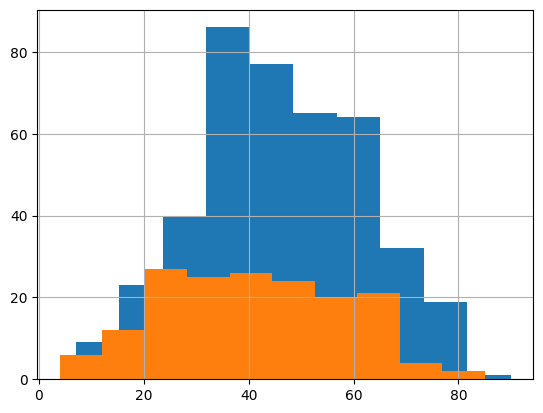

In [ ]:
liver["Age"].hist()

Let's look at Bilirubin measure, too...

# Custom Aggregation Function

It can also be handy to be able to create custom aggregation functions.  For our example, we're going to create a `percent_male` function that returns the percent of items in each group that are male.

## Custom Aggregation with `apply`

In [ ]:
def percent_range(df, column='Age', min_value=-1, max_value=999):
    # Compute the percent of rows where *column* is *value*
    total = len(df)
    part = sum((df[column].astype(float) >= float(min_value)) & (df[column].astype(float) <= float(max_value)))

    # Return this is a single valued Series
    return pd.Series([part, part/total],
                     index=[str(min_value)+' to '+str(max_value),str(min_value)+' to '+str(max_value)+'%'])

In [ ]:
liver.apply(percent_range, column='Age', min_value=0, max_value=18)

/tmp/ipython-input-3135160585.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  liver.apply(percent_range, column='Age', min_value=0, max_value=18)


,0 to 18,0 to 18%
Dataset,,
1,21.0,0.050481
2,15.0,0.089820


In [ ]:
liver.apply(percent_range, column='Age')

/tmp/ipython-input-4283923160.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  liver.apply(percent_range, column='Age')


,-1 to 999,-1 to 999%
Dataset,,
1,416.0,1.0
2,167.0,1.0


In [ ]:
liver.apply(percent_range, column='Total_Bilirubin', min_value=0, max_value=10)

/tmp/ipython-input-1437270527.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  liver.apply(percent_range, column='Total_Bilirubin', min_value=0, max_value=10)


,0 to 10,0 to 10%
Dataset,,
1,366.0,0.879808
2,167.0,1.000000
